# Exploring Activation Functions in Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

**Load the MNIST dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Convert labels to one-hot encoding**

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Building Model**

In [ ]:
def build_model(activation_function):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_function),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
activations = ['sigmoid', 'tanh', 'relu']
results = {}

In [ ]:
for activation in activations:
    print(f'Training with {activation} activation...')
    model = build_model(activation)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    results[activation] = test_acc

Training with sigmoid activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.8954 - loss: 0.4036 - val_accuracy: 0.9362 - val_loss: 0.2236
Epoch 2/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9433 - loss: 0.1956 - val_accuracy: 0.9523 - val_loss: 0.1618
Epoch 3/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9585 - loss: 0.1420 - val_accuracy: 0.9614 - val_loss: 0.1288
Epoch 4/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9682 - loss: 0.1097 - val_accuracy: 0.9647 - val_loss: 0.1110
Epoch 5/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9744 - loss: 0.0877 - val_accuracy: 0.9699 - val_loss: 0.0968
Epoch 6/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9803 - loss: 0.0714 - val_accuracy: 0.9742 - val_loss: 0.0888
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9836 - loss: 0.0589 - val_accuracy: 0.9746 - val_loss: 0.0828
Epoch 8/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9867 - loss: 0.0495 - val_accuracy: 0.9753 - val_loss: 0.0793
Epoch 9/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9890 - loss: 0.0415 - val_accuracy: 0.9774 -

**Bar chart of accuracy**

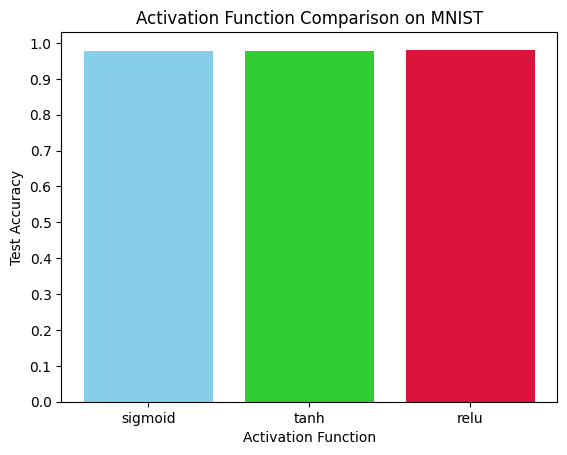

In [ ]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color=['skyblue', 'limegreen', 'crimson'])
plt.xlabel('Activation Function')
plt.ylabel('Test Accuracy')
plt.title('Activation Function Comparison on MNIST')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

**Dataframe for Accuracy with their Activation function**

In [12]:
import pandas as pd
df = pd.DataFrame(results.items(), columns=['Activation Function', 'Accuracy'])
print(df)

  Activation Function  Accuracy
0             sigmoid    0.9766
1                tanh    0.9783
2                relu    0.9812


# Report: Comparison of Activation Functions on MNIST Dataset



---


**Introduction.**

Activation functions are a crucial component in neural networks, influencing how the network learns and performs. In this report, we explore the impact of three common activation functions—Sigmoid, Tanh, and ReLU—on the performance of a simple neural network trained to classify handwritten digits from the MNIST dataset.


---


**Activation Functions.**

**Sigmoid**: Maps input values to the range [0, 1]. It is prone to the vanishing gradient problem, which can slow down the learning process, especially in deeper networks.

**Tanh**: Similar to Sigmoid but maps input values to the range [-1, 1], centering the output around zero. This centering can help mitigate some of the vanishing gradient issues observed with Sigmoid.

**ReLU (Rectified Linear Unit)**: Applies a simple thresholding, where any negative value is set to zero, and positive values are kept as is. ReLU is computationally efficient and helps to alleviate the vanishing gradient problem, although it can lead to "dead neurons."


---
**Results.**

The models were trained, and their validation accuracies were tracked over 10 epochs. The final validation accuracies for each activation function are as follows:

Sigmoid: Validation Accuracy: 97.66%

Tanh: Validation Accuracy: 97.83%

ReLU: Validation Accuracy: 98.12%


---


**Observations.**



1.   Training and Validation Accuracy:

  Sigmoid: The network with Sigmoid activation showed slower convergence, with validation accuracy peaking at around 97.66%. The vanishing gradient issue may have limited the network’s ability to learn efficiently, particularly as the network became deeper.

  Tanh: The Tanh activation function performed slightly better than Sigmoid, achieving a validation accuracy of 97.83%. The zero-centered outputs likely facilitated better weight updates, leading to faster convergence compared to Sigmoid.

  ReLU: The network using ReLU activation outperformed the others, reaching a validation accuracy of 98.12%. The faster convergence and ability to maintain non-zero gradients contributed to its superior performance.
2.   Computation Efficiency:

  ReLU is computationally simpler compared to Sigmoid and Tanh, which involve exponential functions. This simplicity contributed to faster training times and makes ReLU a preferred choice in practical applications.


---


**Conclusion and Recommendation.**

Based on the experiments conducted, ReLU is the best-performing activation function for the MNIST dataset in this simple neural network. It achieved the highest validation accuracy, demonstrated strong generalization capabilities, and is computationally efficient.

For most image classification tasks, especially those involving deep learning models, ReLU should be the default choice for hidden layer activation. Its ability to avoid the vanishing gradient problem and its computational efficiency make it well-suited for a wide range of applications.


---

